In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
INDJPN_df = pd.read_csv("C:/Users/soumy/Documents/Python Scripts/Economics Python Project/India-Japan Analysis Data.csv")

In [3]:
INDJPN_df.columns = ["Year_Q", "Exports_Ind_Jpn", "GDP_Jpn", "INR_YEN_ER", "Crude_Oil_Price"]

In [4]:
INDJPN_df.head(68)

,Year_Q,Exports_Ind_Jpn,GDP_Jpn,INR_YEN_ER,Crude_Oil_Price
0,2008-Q1,1165354,1.257347e+06,4176.016483,97.936667
1,2008-Q2,786216,1.256306e+06,4351.101195,123.953333
2,2008-Q3,826675,1.206689e+06,4703.337000,118.050000
3,2008-Q4,654374,1.317767e+06,4674.722239,58.346667
4,2009-Q1,718528,1.287276e+06,4652.714703,42.913333
...,...,...,...,...,...
63,2023-Q4,1308819,9.374383e+05,12299.613290,78.410000
64,2024-Q1,1349949,9.291193e+05,12335.856400,77.560000
65,2024-Q2,1386729,8.940841e+05,13002.102310,81.713333
66,2024-Q3,1631834,9.378934e+05,12472.182570,76.240000


In [8]:
# Setting the date

INDJPN_df['Year_Q'] = INDJPN_df['Year_Q'].str.strip()

# Now safely convert quarters → datetime
INDJPN_df['Year_Q'] = pd.PeriodIndex(INDJPN_df['Year_Q'], freq='Q').to_timestamp()

# Set as index
INDJPN_df.set_index('Year_Q', inplace=True)

# Extract time series
ts = INDJPN_df['Exports_Ind_Jpn']

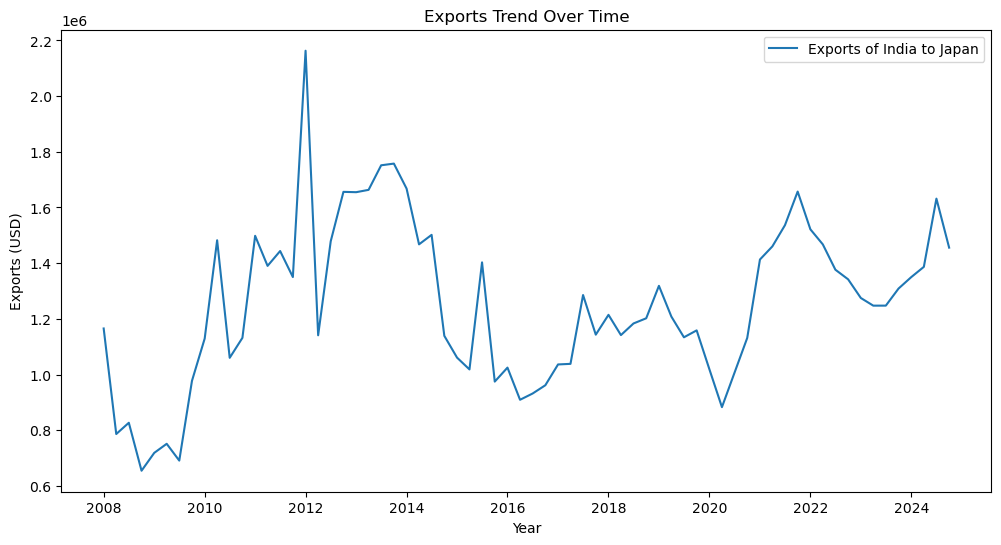

In [9]:
plt.figure(figsize=(12,6))
plt.plot(ts, label="Exports of India to Japan")
plt.xlabel("Year")
plt.ylabel("Exports (USD)")
plt.title("Exports Trend Over Time")
plt.legend()
plt.show()

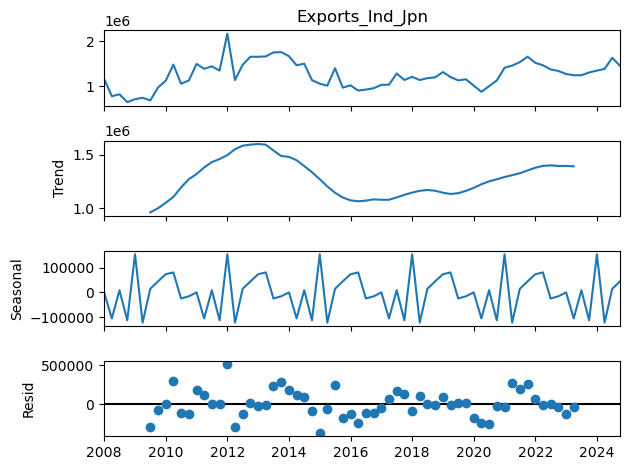

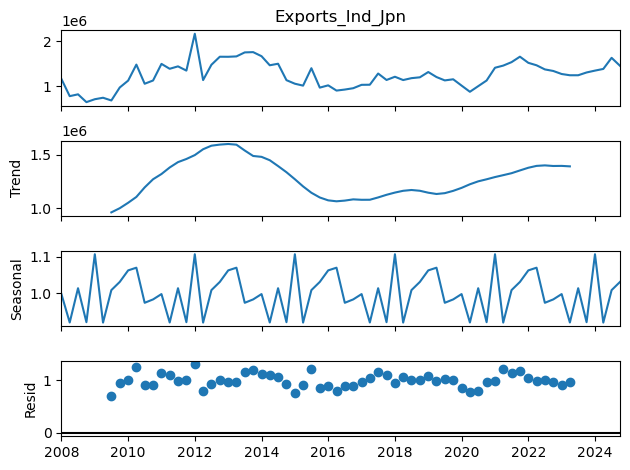

In [10]:
# To observe the Seasonality

from statsmodels.tsa.seasonal import seasonal_decompose

decomp_additive = seasonal_decompose(ts, model='additive', period=12)
decomp_multiplicative = seasonal_decompose(ts, model='multiplicative', period=12)
decomp_additive.plot()
decomp_multiplicative.plot()
plt.show()

NOTES:

We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

Thus, 
- If we look at the residuals of the additive decomposition closely, it has some pattern left over.
- The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

In [11]:
# Checking Stationarity

from statsmodels.tsa.stattools import adfuller

In [12]:
#HYPOTHESIS TEST:
#Ho: It is non stationary
#H1: It is stationary

result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.1145664832842996
p-value: 0.025493816200088473


As p-value < 0.05, we reject the null hypothesis. Thus, time series is stationary.

In [14]:
# Autocorrelation and Partial Auto-correlation

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

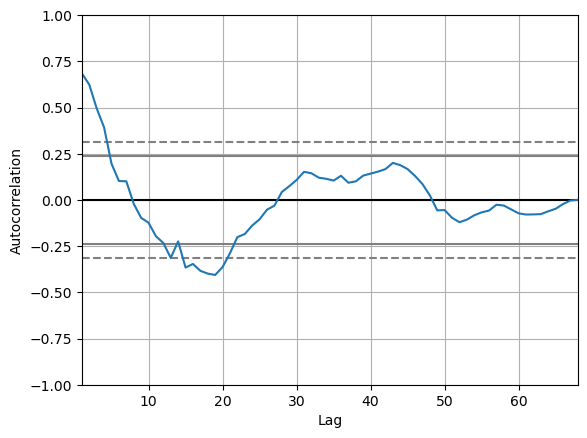

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts)
plt.show()

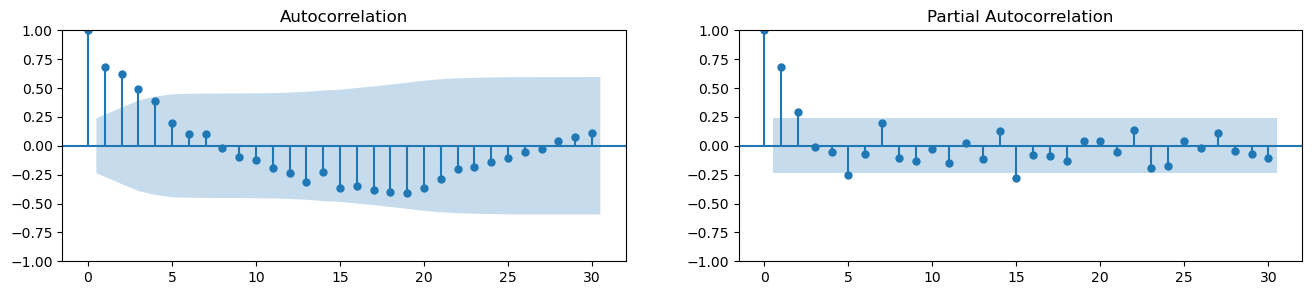

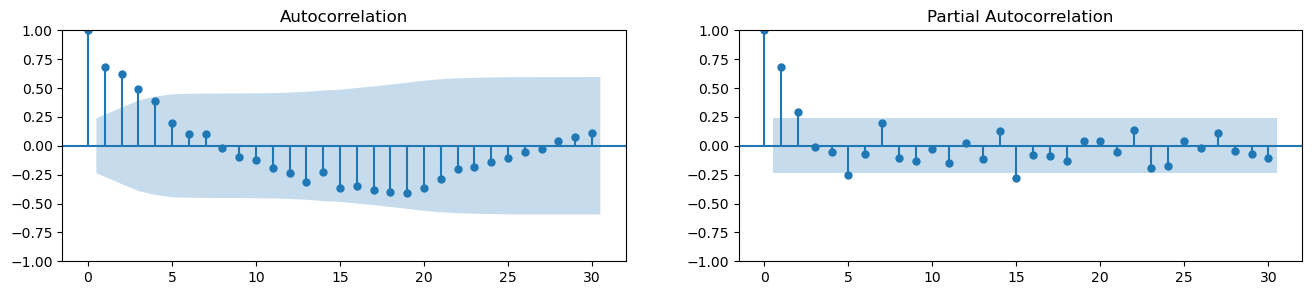

In [19]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ts.tolist(), lags=30, ax=axes[0])
plot_pacf(ts.tolist(), lags=30, ax=axes[1])

ARIMA Model

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
model=ARIMA(ts,order=(1,1,1))
model_fit=model.fit()

C:\Users\soumy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soumy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soumy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [25]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Exports_Ind_Jpn   No. Observations:                   68
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -913.875
Date:                Tue, 19 Aug 2025   AIC                           1833.750
Time:                        21:12:56   BIC                           1840.365
Sample:                    01-01-2008   HQIC                          1836.368
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2182      0.321     -0.679      0.497      -0.848       0.411
ma.L1         -0.2362      0.319     -0.740      0.460      -0.862       0.390
sigma2      4.303e+10   1.15e-11   3.73e+21      0.000     4.3e+10     4.3e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                29.38
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.28e+36. Standard errors may be unstable.
"""

<Axes: xlabel='Year_Q'>

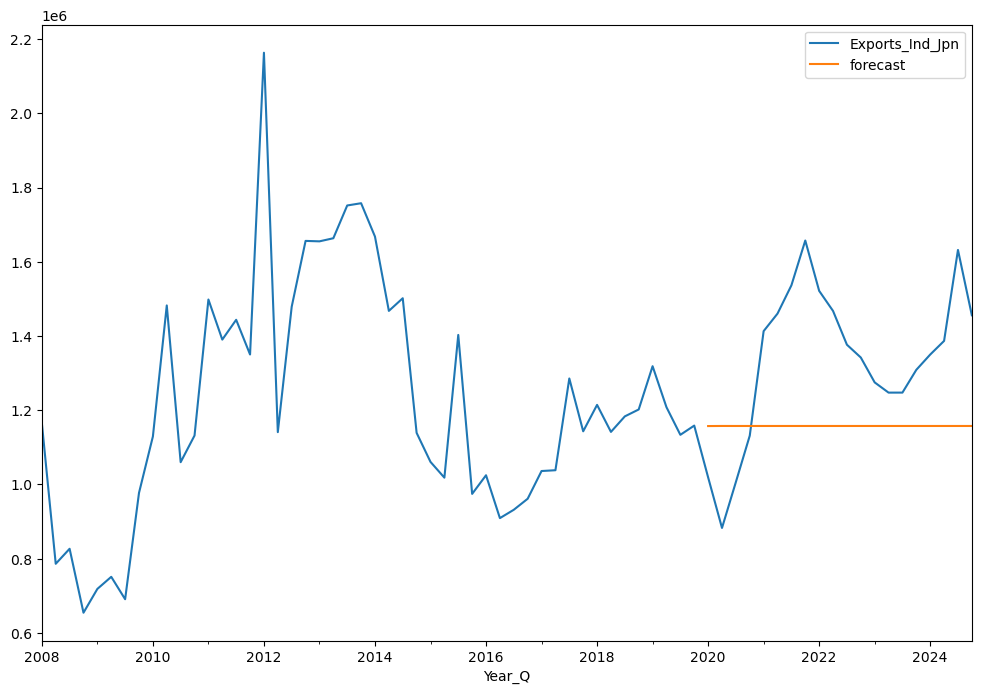

In [37]:
INDJPN_df['forecast']=model_fit.predict(start=48,end=68,dynamic=True) 
INDJPN_df[['Exports_Ind_Jpn','forecast']].plot(figsize=(12,8))

SARIMA MODEL

In [38]:
import statsmodels.api as sm

In [39]:
model=sm.tsa.statespace.SARIMAX(ts,order=(1, 1, 1),seasonal_order=(1,1,1,4))
results=model.fit()

C:\Users\soumy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soumy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Year_Q'>

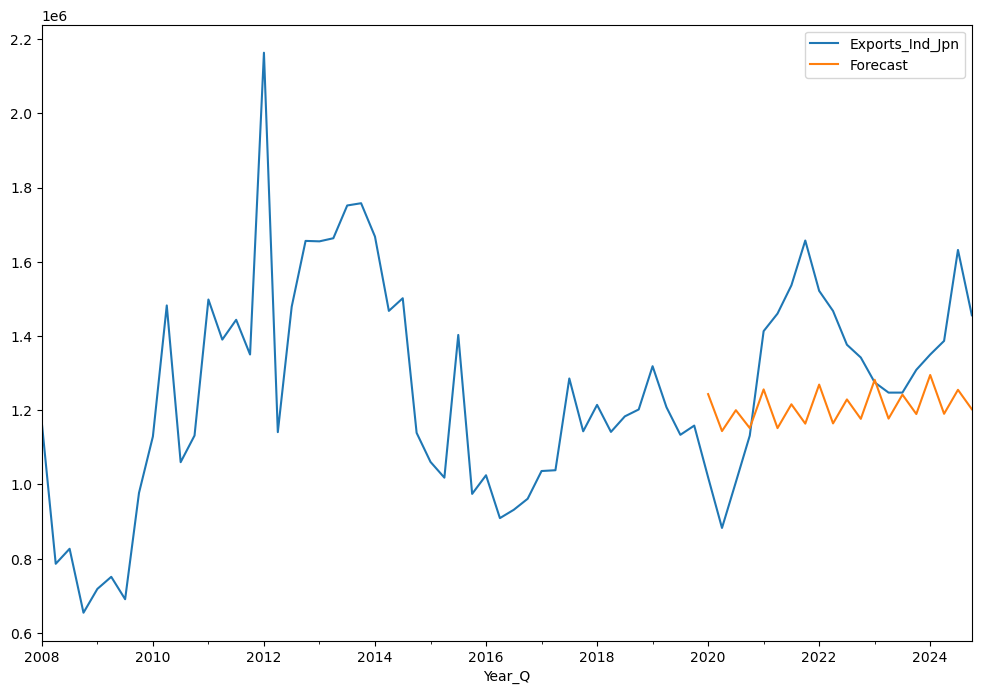

In [41]:
INDJPN_df['Forecast']=results.predict(start=48,end=68,dynamic=True)
INDJPN_df[['Exports_Ind_Jpn','Forecast']].plot(figsize=(12,8))

PREDICTION FOR FUTURE DATASET

In [42]:
from pandas.tseries.offsets import DateOffset

#Here USING FOR LOOP we are adding some additional data for prediction purpose:

future_dates=[INDJPN_df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [44]:
#Convert that list into DATAFRAME:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=INDJPN_df.columns)

In [45]:
future_datest_df.tail()

,Exports_Ind_Jpn,GDP_Jpn,INR_YEN_ER,Crude_Oil_Price,forecast,Forecast
2026-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2026-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2026-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2026-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2026-09-01,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#CONCATE THE ORIGINAL AND THE NEWLY CREATED DATASET FOR VISUALIZATION PURPOSE:
future_df=pd.concat([INDJPN_df,future_datest_df])

<Axes: >

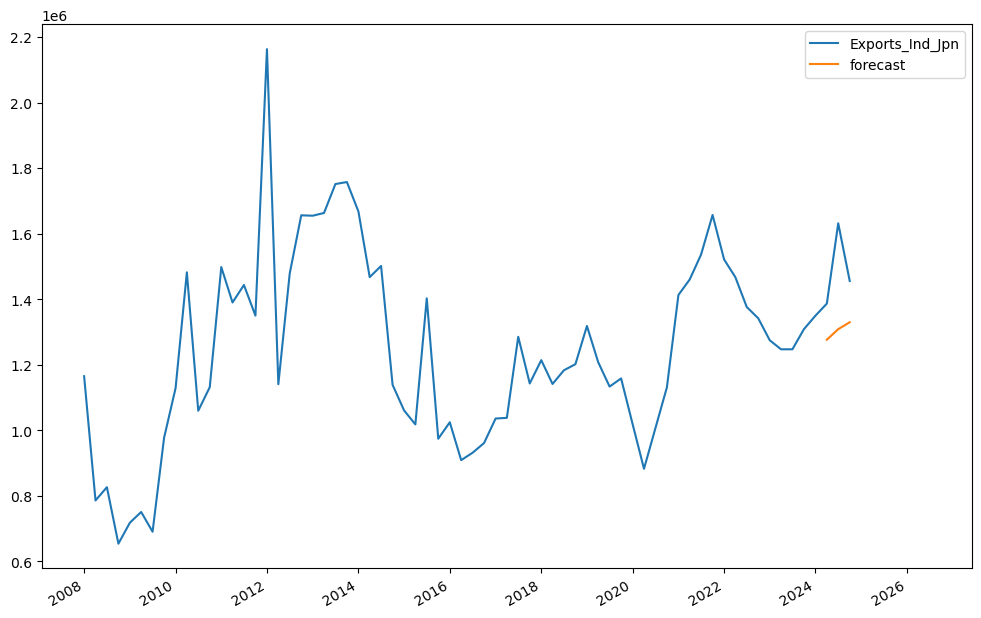

In [51]:
#PREDICT

future_df['forecast'] = results.predict(start = 69, end = 90 , dynamic= True)  
future_df[['Exports_Ind_Jpn', 'forecast']].plot(figsize=(12, 8))

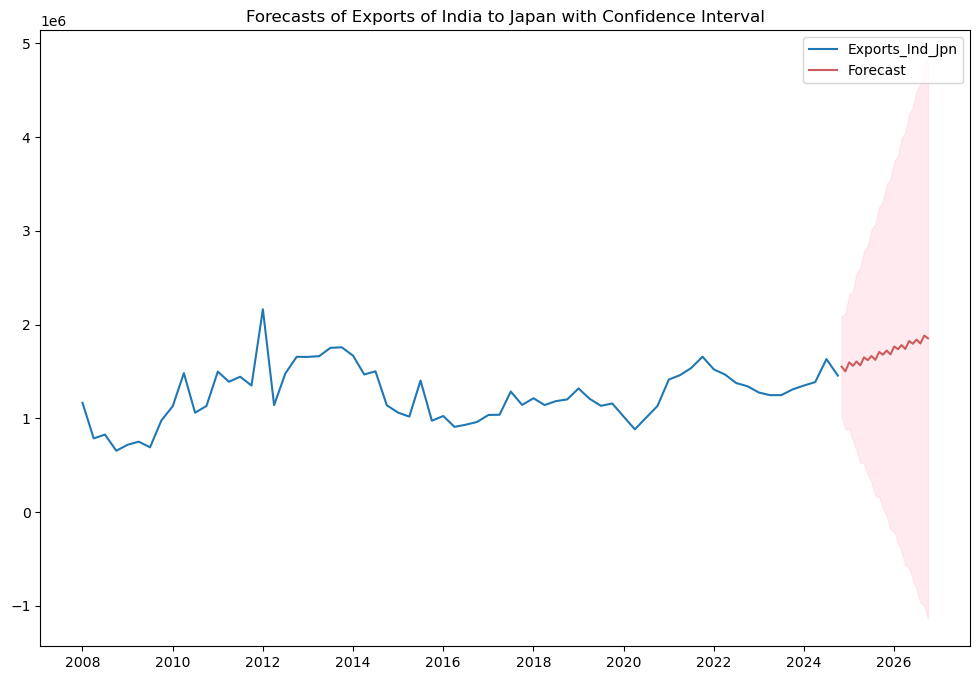

In [59]:
#PREDICT

# Forecast horizon (24 months)
future_steps = 24  

# 1. Create proper future date index
last_date = INDJPN_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), 
                             periods=future_steps, freq='MS')

# 2. Generate forecast from ARIMA
forecast_res = results.get_forecast(steps=future_steps)

# Extract mean and confidence intervals
forecast_mean = forecast_res.predicted_mean
forecast_ci = forecast_res.conf_int()

# 3. Assign datetime index to forecast
forecast_mean.index = future_dates
forecast_ci.index = future_dates

# 4. Plot actual + forecast
plt.figure(figsize=(12,8))
plt.plot(INDJPN_df.index, INDJPN_df['Exports_Ind_Jpn'], label='Exports_Ind_Jpn')
plt.plot(forecast_mean.index, forecast_mean, color='indianred', label='Forecast')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.legend()
plt.title("Forecasts of Exports of India to Japan with Confidence Interval")
plt.show()


In [58]:
# Forecast horizon = 24 months (2 years)
future_steps = 24  
forecast_res = results.get_forecast(steps=future_steps)
forecast_mean = forecast_res.predicted_mean

# Get starting and ending forecast values
start_val = forecast_mean.iloc[0]   # forecast at start of 2025
end_val   = forecast_mean.iloc[-1]  # forecast at end of 2026

# Compute % change
pct_change = ((end_val - start_val) / start_val) * 100
print(f"Forecasted % change in exports over next 2 years: {pct_change:.2f}%")


Forecasted % change in exports over next 2 years: 19.49%
